# Preparing Data for a Machine Learning Trading Strategy

## Background

Before adding the power of machine learning into a trading algorithm, it's crucial to prepare the data that you will use to fit the model.

In this activity, you’ll prepare training and testing data for fitting a machine learning-powered trading algorithm.

## Instructions

1. Read the provided OHLCV data provided in the CSV file into a Pandas DataFrame.

    > **Hint:** Remember to set the `date` columns as the DataFrame index and parse the dates.

2. Use the `pct_change` function to add a daily returns values column to the DataFrame. Name this column `actual_returns`.

    > **Hint:** Remove NAN values from the DataFrame.

3. Generate the features and target set as follows:

    * Set a short and long window size of 4 and 100 days, respectively, and add the fast and slow simple moving average columns to the DataFrame.

      > **Hint:** Remove NAN values from the DataFrame.

    * Create the features set by copying the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`.

    * Add a `signal` column to the DataFrame setting its value to zeroes.

    * Use the Pandas `loc` function to populate the `signal` column as follows: where the `actual_returns` value is greater than or equal to zero, we set the `signal` value to 1. Where the `actual_returns` value is less than zero, we set the `signal` value to −1.

    * Create the target set `y` by copying the values of the `signal` column.

4. Split the data into training and testing sets as follows.

    * Use the pandas `DateOffset` module to set the beginning and end dates for the training the testing sets.

    * Set the `training_begin` date to the minimum date in the DataSet.

    * Set the ending period for the training data with an offset of 3 months

    * Use the `loc` function to generate the training datasets using the `training_begin` and `training_end` dates as lower and upper limits.

    * Create the testing sets using the `loc` function to slice the index starting at the `training_end` value and ending at the last record of the datasets.

5. Use the `StandardScaler` to standardize the training datasets.

In [1]:
# Imports
import pandas as pd
from pathlib import Path

## Read the CSV file into Pandas DataFrame

In [18]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv('ohlcv.csv', index_col = 0,infer_datetime_format=True, 
    parse_dates=True
)
# Review the DataFrame
trading_df.head()

,open,high,low,close,volume
date,,,,,
2018-10-19 09:30:00,16.90,17.18,16.90,17.095,11522
2018-10-19 09:45:00,17.11,17.44,17.11,17.400,70593
2018-10-19 10:00:00,17.40,17.40,17.25,17.280,38885
2018-10-19 10:15:00,17.27,17.27,17.18,17.200,37046
2018-10-19 10:30:00,17.21,17.37,17.19,17.200,46874


## Add a Daily Return Values Column to the DataFrame

In [19]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df['close'].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,open,high,low,close,volume,actual_returns
date,,,,,,
2018-10-19 09:45:00,17.11,17.44,17.11,17.40,70593,0.017841
2018-10-19 10:00:00,17.40,17.40,17.25,17.28,38885,-0.006897
2018-10-19 10:15:00,17.27,17.27,17.18,17.20,37046,-0.004630
2018-10-19 10:30:00,17.21,17.37,17.19,17.20,46874,0.000000
2018-10-19 10:45:00,17.20,17.20,17.10,17.12,11266,-0.004651


,open,high,low,close,volume,actual_returns
date,,,,,,
2020-09-04 14:45:00,6.225,6.26,6.220,6.250,55512,0.003210
2020-09-04 15:00:00,6.255,6.27,6.245,6.250,65810,0.000000
2020-09-04 15:15:00,6.250,6.29,6.250,6.275,202630,0.004000
2020-09-04 15:30:00,6.270,6.28,6.250,6.255,130140,-0.003187
2020-09-04 15:45:00,6.250,6.28,6.250,6.250,190278,-0.000799


## Generate the Features and Target Sets

### Add the Fast and Slow Simple Moving Average Columns to the DataFrame

In [20]:
# Define a window size of 4
window_size1 = 4

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
trading_df['sma_fast'] = trading_df['actual_returns'].rolling(window = window_size1).mean()

In [21]:
# Define a window size of 100
window_size2 = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
trading_df['sma_slow'] = trading_df['actual_returns'].rolling(window = window_size2).mean()

In [22]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()
trading_df.tail()

,open,high,low,close,volume,actual_returns,sma_fast,sma_slow
date,,,,,,,,
2020-09-04 14:45:00,6.225,6.26,6.220,6.250,55512,0.003210,0.000405,-0.000273
2020-09-04 15:00:00,6.255,6.27,6.245,6.250,65810,0.000000,0.001607,-0.000063
2020-09-04 15:15:00,6.250,6.29,6.250,6.275,202630,0.004000,0.002003,-0.000111
2020-09-04 15:30:00,6.270,6.28,6.250,6.255,130140,-0.003187,0.001006,-0.000080
2020-09-04 15:45:00,6.250,6.28,6.250,6.250,190278,-0.000799,0.000003,-0.000103


### Create the features set

In [23]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = trading_df[['sma_fast', 'sma_slow']]


# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
date,,
2018-10-24 15:00:00,-0.000638,-0.000880
2018-10-24 15:15:00,-0.002159,-0.001113
2018-10-24 15:30:00,-0.004171,-0.001121
2018-10-24 15:45:00,-0.004984,-0.001114
2018-10-25 09:30:00,-0.004755,-0.001134


,sma_fast,sma_slow
date,,
2020-09-04 14:45:00,0.000405,-0.000273
2020-09-04 15:00:00,0.001607,-0.000063
2020-09-04 15:15:00,0.002003,-0.000111
2020-09-04 15:30:00,0.001006,-0.000080
2020-09-04 15:45:00,0.000003,-0.000103


### Create the target set

In [24]:
# Create a new column in the trading_df called signal setting its value to zero.
trading_df['signal'] = 0.0

In [25]:
# Create the signal to buy
trading_df.loc[(trading_df['actual_returns']>=0), 'signal'] = 1
trading_df.loc[(trading_df['actual_returns']<0), 'signal'] = -1

In [26]:
# Copy the new signal column to a new Series called y.
y = trading_df['signal']

So the target variable is the signal, (when we should buy and sell). The independent, predictor variables are the two moving averages

## Split the Data Into Training and Testing Datasets

### Set the Training Begin and End Dates

In [27]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [28]:
# Select the start of the training period
training_begin = trading_df.index.min()

# Display the training begin date
print(training_begin)

2018-10-24 15:00:00


In [29]:
# Select the ending period for the training data with an offset of 3 months
training_end = trading_df.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2019-01-24 15:00:00


### Create the Training Datasets

In [30]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
date,,
2018-10-24 15:00:00,-0.000638,-0.000880
2018-10-24 15:15:00,-0.002159,-0.001113
2018-10-24 15:30:00,-0.004171,-0.001121
2018-10-24 15:45:00,-0.004984,-0.001114
2018-10-25 09:30:00,-0.004755,-0.001134


### Create the Testing Datasets

In [31]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
date,,
2019-01-24 15:00:00,-0.000879,-0.000400
2019-01-24 15:15:00,0.000002,-0.000291
2019-01-24 15:30:00,-0.000174,-0.000250
2019-01-24 15:45:00,-0.000351,-0.000344
2019-01-25 09:30:00,0.001598,-0.000248


## Standardize the Data

In [32]:
# Imports
from sklearn.preprocessing import StandardScaler

In [33]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<AxesSubplot:xlabel='date'>

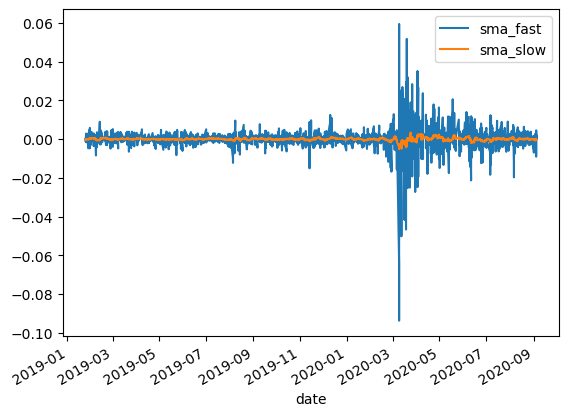

In [38]:
X_test.plot()